<br>

## 1. 데이터탐색과 빈도분석 (Pie chart & Bar chart)

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") # 불필요한 Warning 메시지를 꺼줍니다.

%matplotlib inline

In [142]:
df = pd.read_csv('cosmetics_.csv')
df.head()

,gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
0,1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
1,2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
3,2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
4,1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3


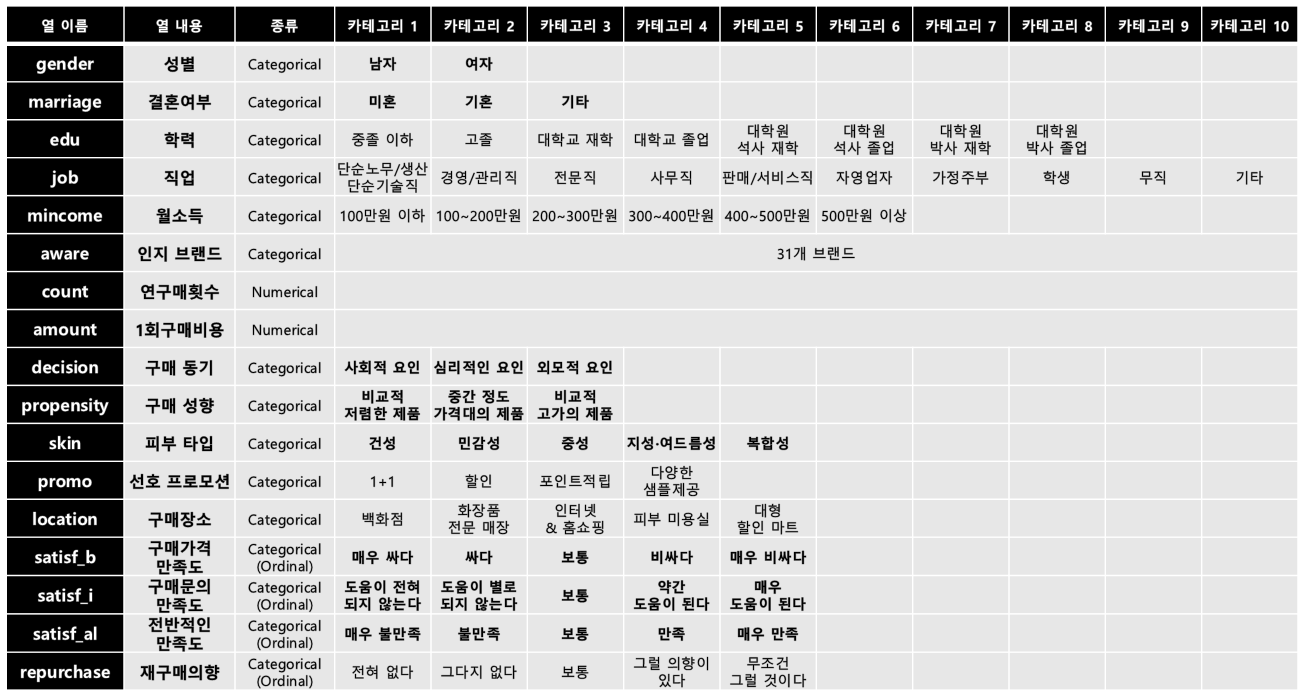

In [143]:
df['gender'] = df['gender'].re?([1, 2], ['male', 'female']) # 교체하다
df.head()

,gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
0,male,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
1,female,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,female,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
3,female,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
4,male,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3


In [144]:
df['gender'].value_counts() 

male      132
female    115
Name: gender, dtype: int64

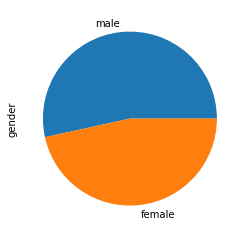

In [139]:
df['gender'].value_counts().?(kind = ?) # plotting a "pie" graph

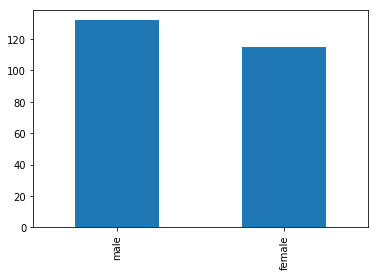

In [145]:
df['gender'].value_counts().?(kind = ?) # plotting a "bar" graph

In [146]:
df.head()

,gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
0,male,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
1,female,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,female,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
3,female,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
4,male,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3


In [147]:
df['marriage'] = df['marriage'].replace([1, 2, 3], ['single', 'married', 'other'])
df['marriage'].value_counts()

married    176
single      71
Name: marriage, dtype: int64

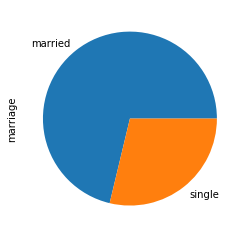

In [148]:
df['marriage'].value_counts().plot(kind="pie")

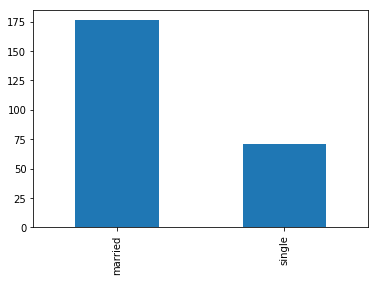

In [149]:
df['marriage'].value_counts().plot(kind="bar")

<br>

## 2. 데이터탐색과 기술통계분석

<br>

#### DataFrame의 기본적인 기술통계량 함수 ('1회 평균 구매 비용'을 기준으로)

In [150]:
df = pd.read_csv('cosmetics_.csv')

In [151]:
df['amount'].max() # 가장 높은 [ 1회 평균 구매 비용 ]

5000000

In [152]:
df['amount'].min()

3000

In [153]:
df['amount'].sum()

38023000

In [154]:
df['amount'].mean()

153939.27125506074

In [155]:
df['amount'].?() # 분산 variance

158463699549.0602

In [156]:
df['amount'].?() # 표준편차 standard deviation

398074.9923683479

In [159]:
df['amount'].describe() 

count    2.470000e+02
mean     1.539393e+05
std      3.980750e+05
min      3.000000e+03
25%      3.000000e+04
50%      5.200000e+04
75%      1.000000e+05
max      5.000000e+06
Name: amount, dtype: float64

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
gender        247 non-null int64
marriage      247 non-null int64
edu           247 non-null int64
job           247 non-null int64
mincome       247 non-null int64
aware         247 non-null int64
count         247 non-null int64
amount        247 non-null int64
decision      247 non-null int64
propensity    247 non-null int64
skin          247 non-null int64
promo         247 non-null int64
location      247 non-null int64
satisf_b      247 non-null int64
satisf_i      247 non-null int64
satisf_al     247 non-null int64
repurchase    247 non-null int64
dtypes: int64(17)
memory usage: 32.9 KB


<br>

#### 분포의 왜도와 첨도

<br>

- <b>왜도(분포가 좌우로 치우쳐진 정도)</b>가 <span style='color:red;'><b>0</b></span> & <b>첨도(분포가 뾰족한 정도)</b>가 <span style='color:red;'><b>1</b></span>일 때 <span style='color:red;'><b>완전한 정규분포</b></span>로 가정할 수 있음 (https://j.mp/367VXKj)

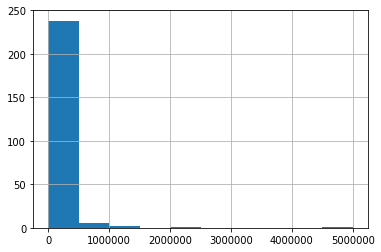

In [165]:
# amount == 1회 평균 구매 비용 

df['amount'].?() # Histogram

In [171]:
# 왜도 (Skewness) : 0에 가까울수록 정규분포라고 가정할 수 있음 (절대값 기준 3 미초과)
# - 분포에서 긴 꼬리가 왼쪽에 있으면(분포가 우측으로 치우친 경우) 음(negative)의 왜도
# - 분포에서 긴 꼬리가 오른쪽에 있으면(분포가 왼쪽으로 치우친 경우) 양(positive)의 왜도

df['amount'].skew() 

8.727245406515182

In [179]:
# 첨도 (Kurtosis, 분포의 뾰족한 정도) : 1에 가까울수록 정규분포라고 가정할 수 있음 (절대값 기준 8 또는 10을 미초과)
    
df['amount'].kurtosis()

94.95150601199587

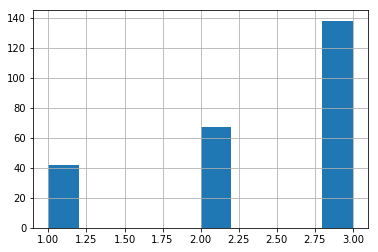

In [174]:
df['decision'].hist() # 구매 요인 (사회적 요인, 심리적 요인, 외모적 요인)

In [176]:
df['decision'].skew() # 왜도, 분포에서 긴 꼬리가 왼쪽에 있으면 음(negative)의 왜도, 그 반대의 경우 양(positive)의 왜도를 가진다고 한다. 

-0.7874015776363626

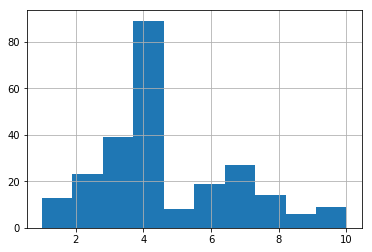

In [177]:
df['job'].hist()

In [178]:
df['job'].kurtosis() # 첨도, 분포의 뾰족한 정도

-0.12032961249934582

<br>

#### Histogram & Distribution plot & Joint plot ('연 구매 횟수'와 '1회 평균 구매 비용'을 기준으로)

In [173]:
df.describe()

,gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,1.465587,1.712551,4.566802,4.578947,3.757085,3.319838,4.327935,1.539393e+05,2.388664,1.975709,2.761134,2.016194,2.465587,2.890688,3.404858,3.461538,3.554656
std,0.499827,0.453492,1.709191,2.199603,1.674079,5.575692,4.422061,3.980750e+05,0.761599,0.680310,1.488311,0.821300,1.073437,0.780995,0.830110,0.752731,0.724182
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000e+04,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000
50%,1.000000,2.000000,4.000000,4.000000,4.000000,2.000000,3.000000,5.200000e+04,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000
75%,2.000000,2.000000,6.000000,6.000000,5.000000,2.000000,5.000000,1.000000e+05,3.000000,2.000000,4.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000
max,2.000000,2.000000,8.000000,10.000000,6.000000,31.000000,36.000000,5.000000e+06,3.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B11199FEB8>,
      dtype=object)

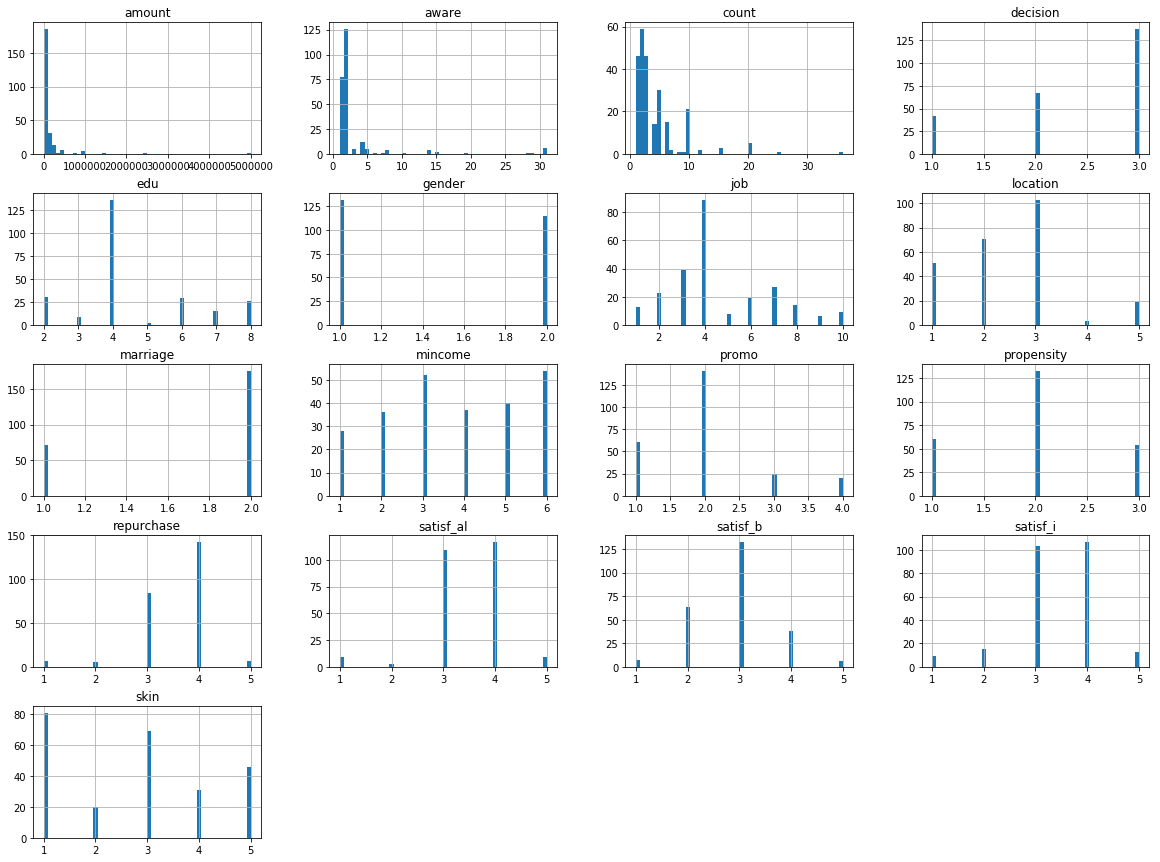

In [160]:
df.hist(bins=50, figsize=(20,15))

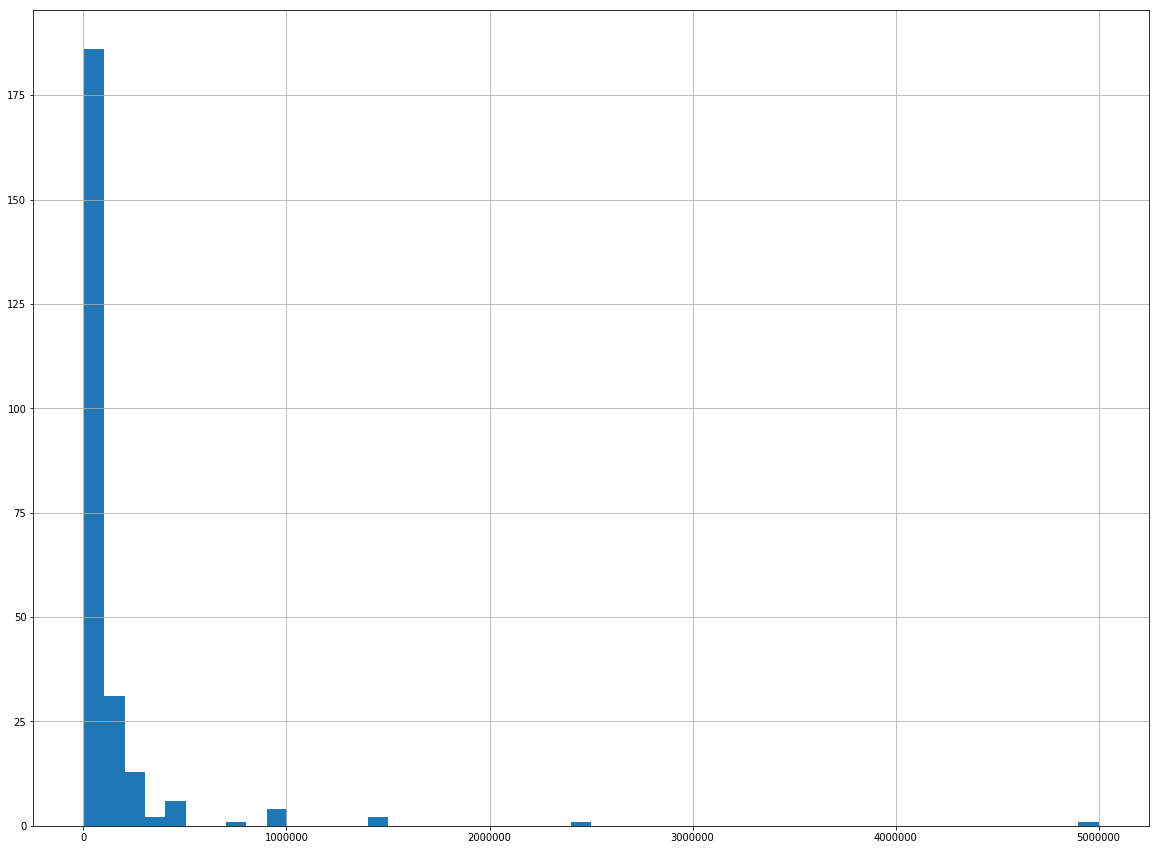

In [161]:
df_amount = df['amount'] # 1회 평균 구매 비용
df_amount.hist(bins=50, figsize=(20,15))

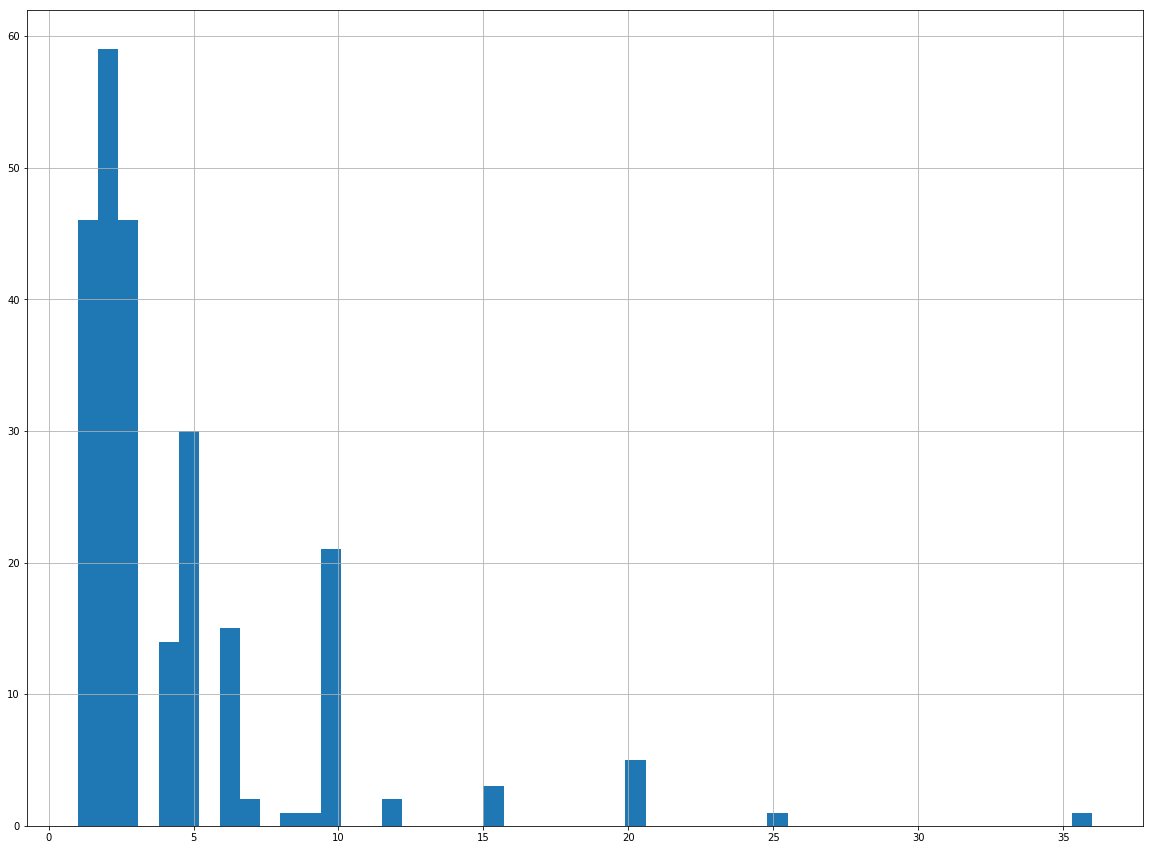

In [180]:
df_count= df['count'] # 연 구매 횟수
df_count.hist(bins=50, figsize=(20,15))

In [ ]:
import seaborn as sns

sns.?(df_amount, rug=True) 
# "dist"ribution plot 
# rug : Whether to draw a rugplot on the support axis
# rugplot : 그래프 상에서 x축 위의 작은 선분으로 실제 데이터의 위치를 나타내준 것 (False로 지정하여 차이를 확인)

In [ ]:
sns.?(x="amount", y="count", data=df) # 산점도와 히스토그램을 한번에 -> Joint-plot 

In [ ]:
sns.jointplot(x="amount", y="count", data=df, kind="kde") # Kernel-density (커널이라는 함수를 활용해 추정한 확률밀도함수를 겹쳐 그려주는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여줌, 상세 설명 @ https://j.mp/35TVL12)

# 꼬리가 너무 긴 형태의 분포 -> 이상치가 분포를 제대로 확인하는 것을 방해하고 있을 수 있음 

<br>

## 3. Outlier 의 탐지 및 제거와 전후 분포 비교 (IQR Score 활용)

- Ways to Detect and Remove the Outliers @ https://j.mp/2JmPKSN
- (추가 학습) Outlier는 모두 제거해야할까?: Outlier detection, IQR @ https://j.mp/35467fq

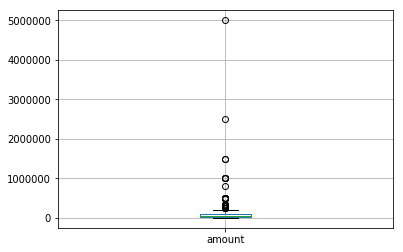

In [210]:
df.boxplot(column='amount') # 위와 아래의 작은 검정색 선이 상/하한선, 그 밖의 경우는 Outlier (동그라미로 표시해 줌)

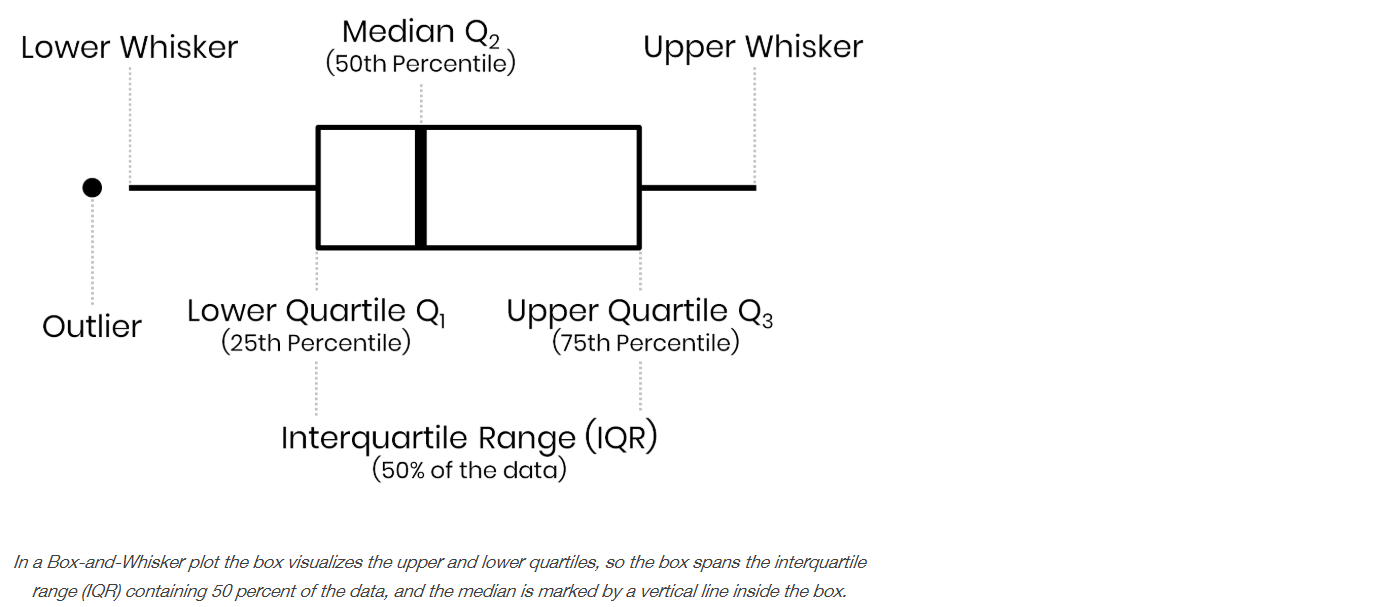

In [196]:
df['amount'].describe()

count    2.470000e+02
mean     1.539393e+05
std      3.980750e+05
min      3.000000e+03
25%      3.000000e+04
50%      5.200000e+04
75%      1.000000e+05
max      5.000000e+06
Name: amount, dtype: float64

In [192]:
df['amount'].?() # 사분위수(Quantile), default == 0.5

52000.0

In [194]:
df['amount'].?() # 중위값 (Median)

52000.0

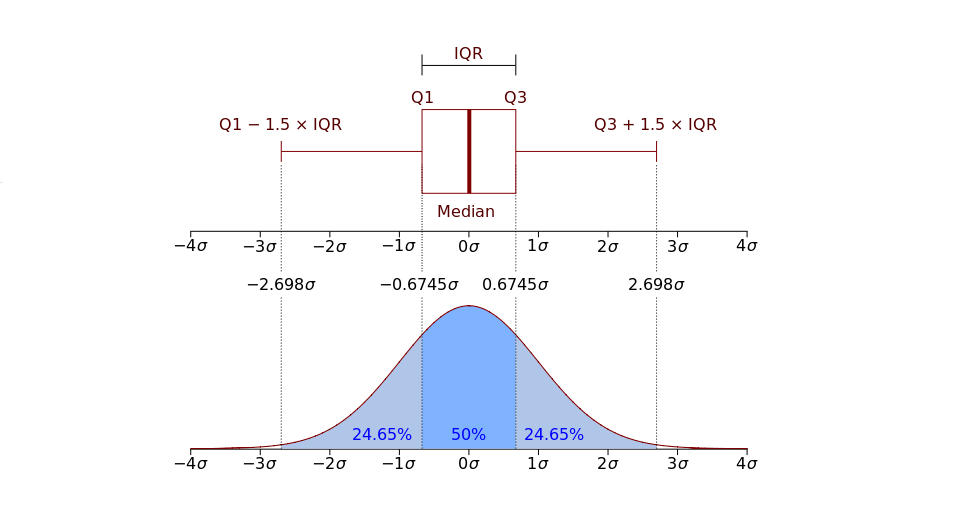

<center> Image source @ https://j.mp/35680bt </center>

In [189]:
# Inter-Quantile Range == 바닥부터 75% 지점의 값 - 바닥부터 25% 지점의 값

Q1 = df['amount'].quantile(q = 0.25)
Q3 = df['amount'].quantile(q = 0.75)

IQR = Q3 - Q1
IQR

70000.0

In [198]:
# 상한치 : 바닥부터 75% 지점의 값 + IQR의 1.5배 
# 하한치 : 바닥부터 25% 지점의 값 - IQR의 1.5배 
# 그 기준을 넘기면 Outlier로 판단이 가능 

df_IQR = df[ (df['amount'] < Q3 + IQR * 1.5) & (df['amount'] > Q1 - IQR * 1.5) ]  

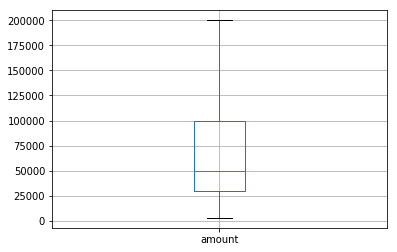

In [211]:
df_IQR.boxplot(column='amount') # 위 아래의 작은 검정색 선이 상/하한선, 그 밖의 경우는 Outlier (동그라미로 표시해 줌)

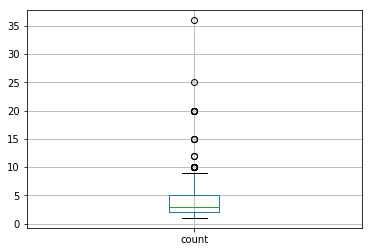

In [217]:
df.boxplot(column='count') # 위 아래의 작은 검정색 선이 상/하한선, 그 밖의 경우는 Outlier (동그라미로 표시해 줌)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B116B03D30>,
      dtype=object)

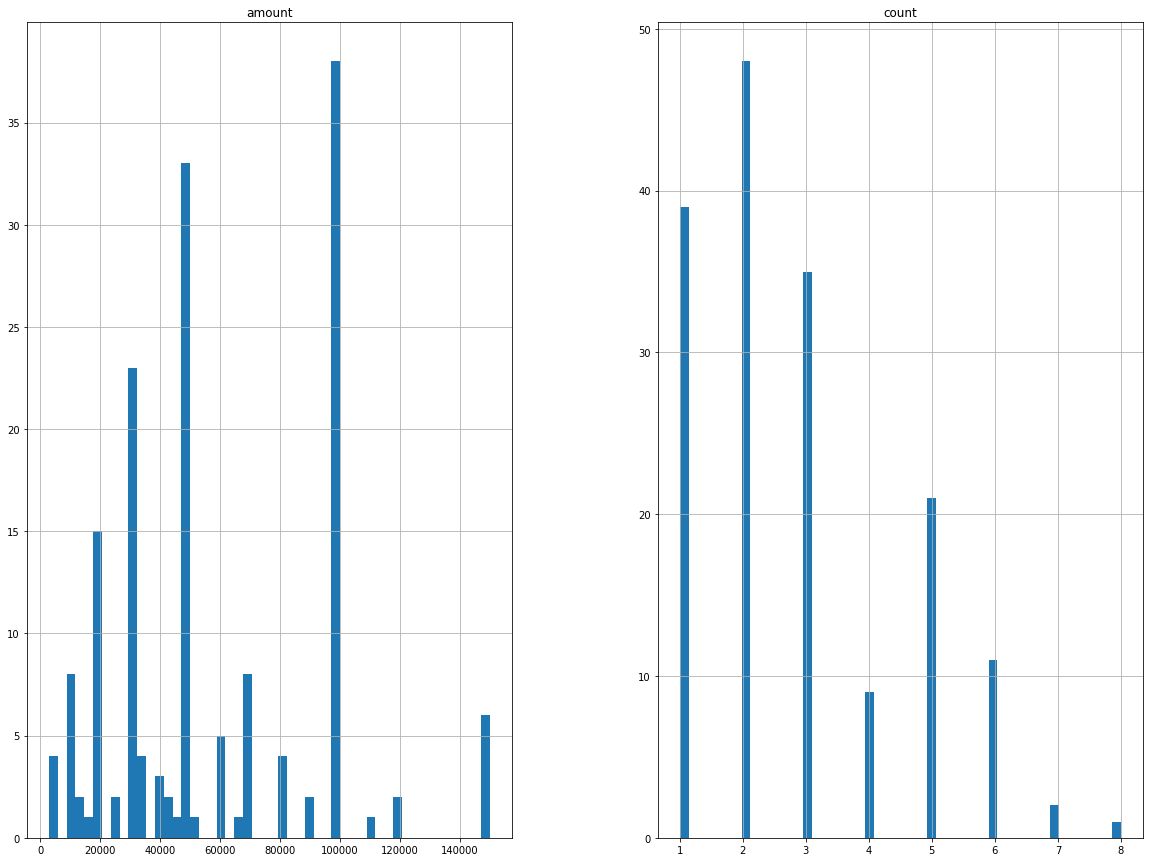

In [227]:
processed_df = df[['amount', 'count']]
processed_df = processed_df[ (processed_df['count'] < 10) & (processed_df['amount'] < 200000) ] # 상한선에 해당하는 값

processed_df.hist(bins=50, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B116DCF320>,
      dtype=object)

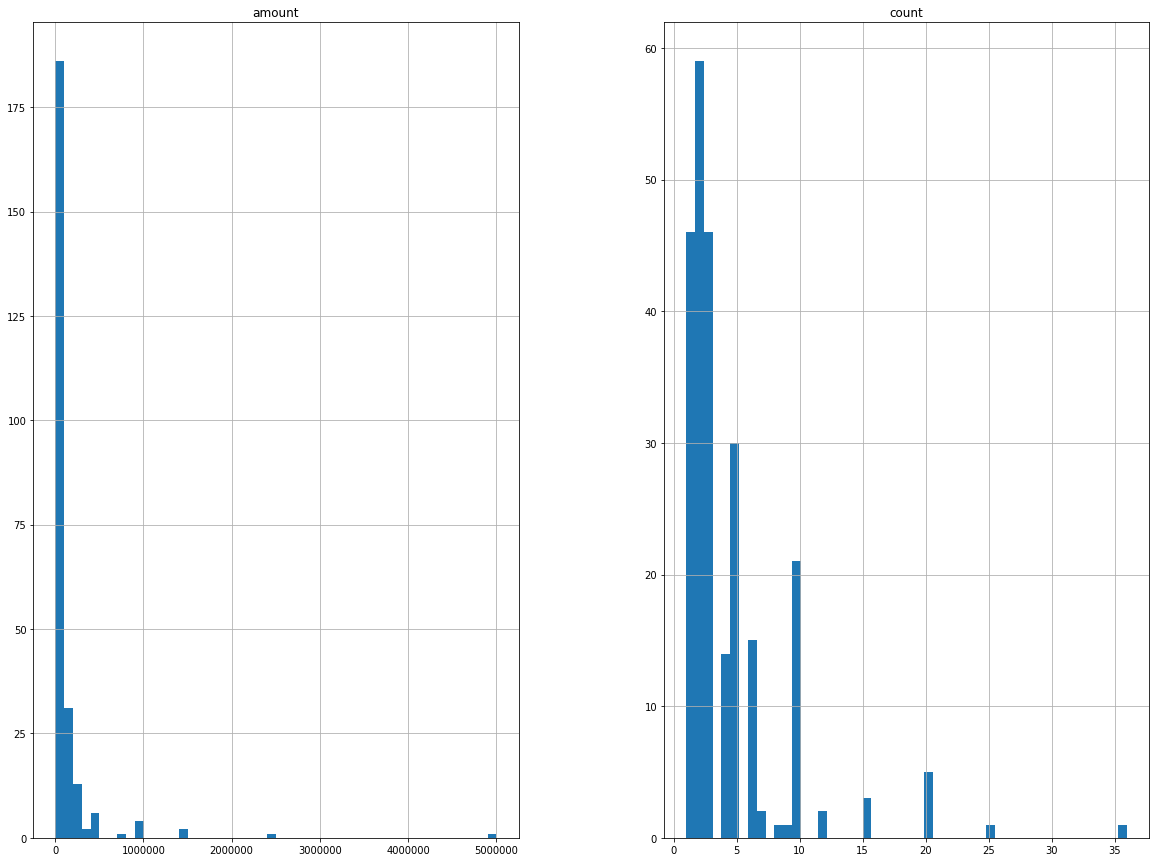

In [221]:
df[['amount', 'count']].hist(bins=50, figsize=(20,15))

In [ ]:
# after

sns.jointplot(x="amount", y="count", data=processed_df)

In [ ]:
# before

sns.jointplot(x="amount", y="count", data=df)

<br>

#### Log 함수를 활용한 Data(Feature) Scaling

<br>

- log는 **큰 수를 같은 비율의 작은 수로 바꿔주는 역할**을 할 수 있음 (큰 수를 작게 만들고 복잡한 계산을 간편하게 만듦, 100 vs 10000(==100^2) -> 10 vs 100(==10^2))
- 데이터 분포의 <span style="color:red;">왜도(좌우로 치우친 정도) 혹은 첨도(뾰족한 정도)가 너무 큰 경우, Log 함수를 적용해 왜도/첨도를 낮춰주는 전처리를 적용</span>할 수 있음
- 결과적으로 이를 통해 <span style="color:red;"><b>데이터(열)의 정규성</b></span>을 높이고 각종 분석에서 보다 나은(정확한) 값을 얻을 수 있음

In [ ]:
sns.jointplot(x="amount", y="count", data=processed_df, kind="kde")

# count에 비해 amount의 Scale이 너무 큰 상태

In [ ]:
processed_df['logamount'] = np.?(processed_df['amount']) # Log 를 취한다.

In [ ]:
sns.jointplot(x="logamount", y="count", data=processed_df, kind="kde")